In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

import joblib
import pandas as pd

In [2]:

# get data
weather_data = pd.read_csv("../vedur/vedurGogn/allarStodvar.csv", delimiter=",", names=["year", "month", "average temperature"], skiprows=1)

weather_data = weather_data.dropna()

accidents_data = pd.read_csv("../accidents/formatted-accident-data.csv", delimiter=",", names=["year", "month", "amount of accidents"], skiprows=1)
accidents_data = accidents_data.dropna()

data = pd.merge(weather_data, accidents_data, on=["year", "month"])

temperatures = data["average temperature"]
accidents = data["amount of accidents"]

# average accidents per month
print("average accidents per month:", accidents.mean())

X = temperatures.values.reshape(-1, 1)
y = accidents.values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

average accidents per month: 246.48809523809524


In [3]:

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.1393142287211797

In [4]:

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Perform 5-fold cross-validation

# Print results
print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}", "lower is better")
print(f"Mean Absolute Error (MAE): {mae:.2f}", "lower is better")
print(f"R-squared Score (R2): {r2:.2f}", "higher is better")
print("Cross-Validation Scores:", "higher is better")
print(cv_scores)

Evaluation Metrics:
Mean Squared Error (MSE): 2128.68 lower is better
Mean Absolute Error (MAE): 39.46 lower is better
R-squared Score (R2): 0.14 higher is better
Cross-Validation Scores: higher is better
[-0.47525246 -1.15262578  0.17926531 -0.14678218 -0.29697801]


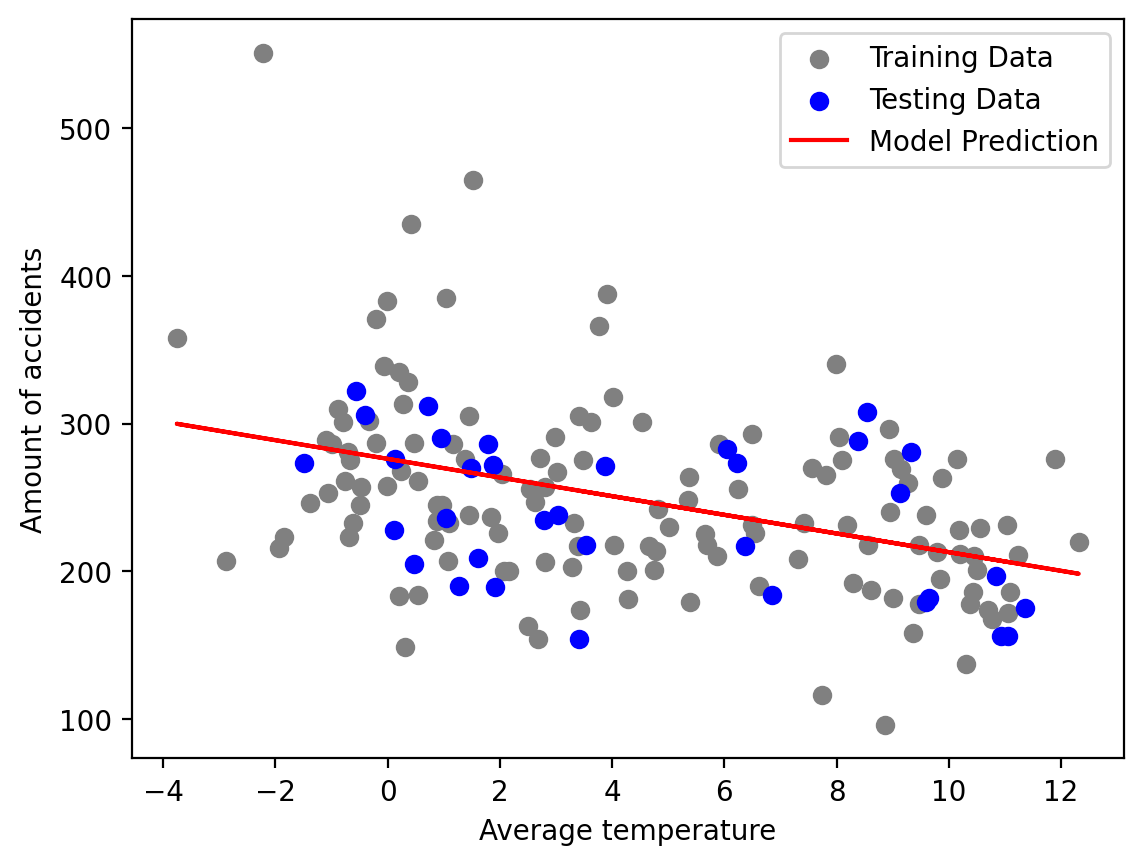

In [18]:

import matplotlib.pyplot as plt

# Visualization
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label="Training Data", color="grey")
plt.scatter(X_test, y_test, label="Testing Data", color="blue")
plt.plot(X_train, model.predict(X_train), color="red", label="Model Prediction")
plt.xlabel("Average temperature")
plt.ylabel("Amount of accidents")
# plt.title("Linear Regression Model")
plt.legend()

# plt.show()
plt.savefig("../figures/highres/isl_model.png")



In [6]:
# save model
# joblib.dump(model, "../mod/els/isl-model.pt", protocol=4)